In [1]:
import pyforest
import matplotlib.pyplot as plt
import seaborn as sn

Brown Dwarf -> Star Type = 0

Red Dwarf -> Star Type = 1

White Dwarf-> Star Type = 2

Main Sequence -> Star Type = 3

Supergiant -> Star Type = 4

Hypergiant -> Star Type = 5

In [2]:
df=pd.read_csv('stars.csv')
df

<IPython.core.display.Javascript object>

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [3]:
df.isnull().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


In [5]:
from sklearn.preprocessing import OrdinalEncoder

In [6]:
spt=['M','K','G','F','A','B','O']
oe=OrdinalEncoder(categories=[spt])
df['Spectral Class']=oe.fit_transform(df[['Spectral Class']])

In [7]:
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,0.0
1,3042,0.000500,0.1542,16.60,0,Red,0.0
2,2600,0.000300,0.1020,18.70,0,Red,0.0
3,2800,0.000200,0.1600,16.65,0,Red,0.0
4,1939,0.000138,0.1030,20.06,0,Red,0.0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,6.0
236,30839,834042.000000,1194.0000,-10.63,5,Blue,6.0
237,8829,537493.000000,1423.0000,-10.73,5,White,4.0
238,9235,404940.000000,1112.0000,-11.23,5,White,4.0


In [8]:
df['Star color'].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'Blue ',
       'yellowish', 'Yellowish', 'Orange-Red', 'Blue white ',
       'Blue-White'], dtype=object)

In [9]:
df.drop(columns='Star color',inplace=True)

In [10]:
cord=df.corr()['Spectral Class'][:-1]

In [11]:
cord

Temperature (K)           0.817444
Luminosity(L/Lo)          0.346568
Radius(R/Ro)             -0.060728
Absolute magnitude(Mv)   -0.415359
Star type                 0.461116
Name: Spectral Class, dtype: float64

<IPython.core.display.Javascript object>

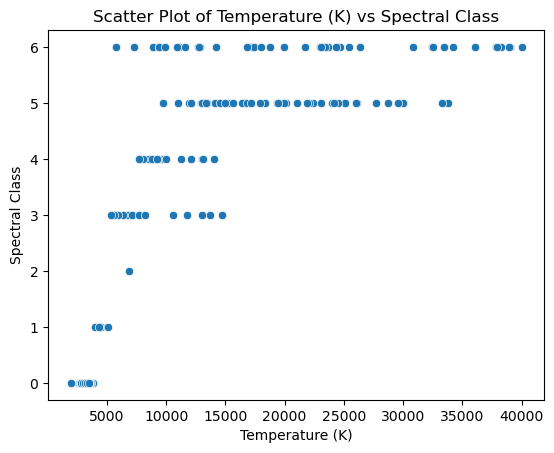

<IPython.core.display.Javascript object>

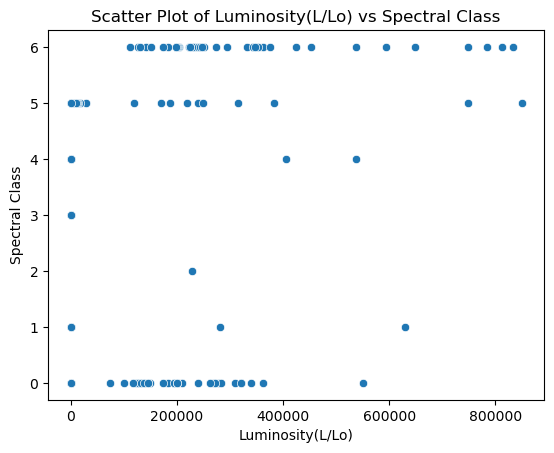

<IPython.core.display.Javascript object>

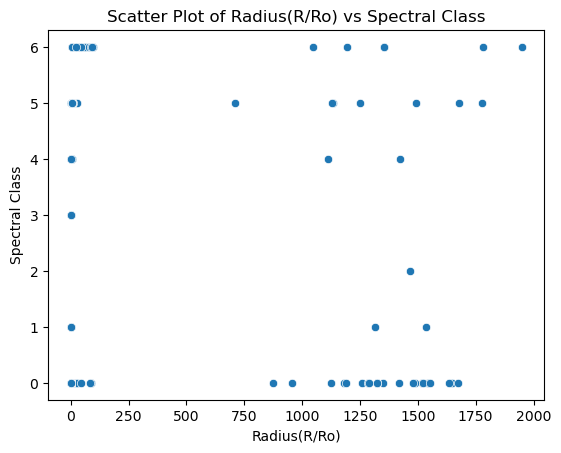

<IPython.core.display.Javascript object>

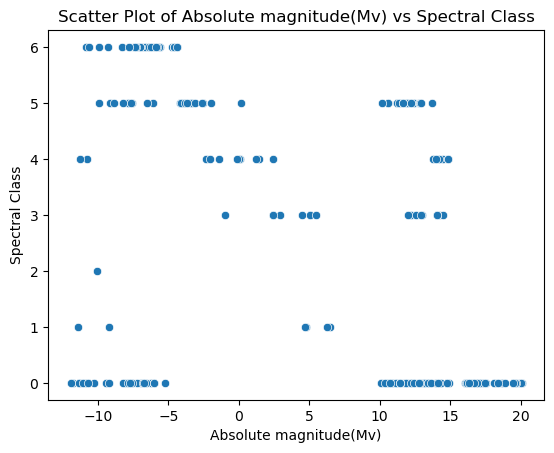

<IPython.core.display.Javascript object>

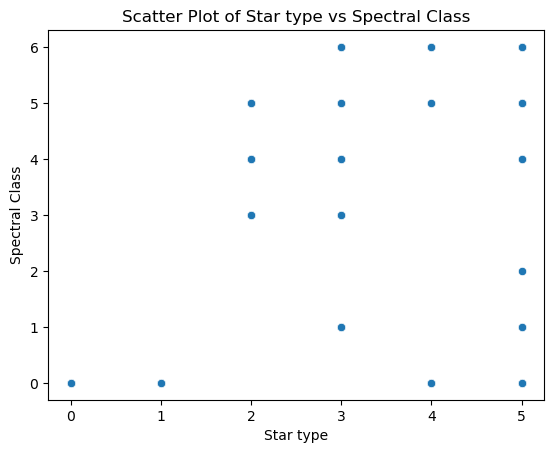

In [12]:
for col in df.columns:
    if col != 'Spectral Class': 
        plt.figure()
        sns.scatterplot(x=df[col], y=df['Spectral Class'])
        plt.xlabel(col)
        plt.ylabel('Spectral Class')
        plt.title(f'Scatter Plot of {col} vs Spectral Class')
        plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [15]:
X=df.drop(['Spectral Class'],axis=1)
y=df['Spectral Class']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [19]:
y_pred = rf_clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8958333333333334
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        21
         1.0       1.00      0.33      0.50         3
         3.0       0.33      0.50      0.40         2
         4.0       1.00      0.50      0.67         2
         5.0       0.77      1.00      0.87        10
         6.0       1.00      0.90      0.95        10

    accuracy                           0.90        48
   macro avg       0.85      0.71      0.73        48
weighted avg       0.92      0.90      0.89        48

Confusion Matrix:
[[21  0  0  0  0  0]
 [ 0  1  2  0  0  0]
 [ 0  0  1  0  1  0]
 [ 0  0  0  1  1  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0  1  9]]


In [20]:
##testing

In [21]:
#sirius
input_data = {
    'Temperature (K)':9940 ,
    'Luminosity(L/Lo)': 25.4,
    'Radius(R/Ro)': 1.71,
    'Absolute magnitude(Mv)': 1.42,
    'Star type': 3
}

In [22]:
input_df = pd.DataFrame([input_data])

<IPython.core.display.Javascript object>

In [23]:
input_scaled = scaler.transform(input_df)

In [24]:
predicted_class = rf_clf.predict(input_scaled)

In [25]:
predicted_spectral_class = oe.inverse_transform(predicted_class.reshape(-1, 1))
print(f'Predicted Spectral Class: {predicted_spectral_class[0][0]}')

Predicted Spectral Class: A


In [26]:
#arcturus
input_data1 = {
    'Temperature (K)':4286 ,
    'Luminosity(L/Lo)': 170,
    'Radius(R/Ro)': 25.4,
    'Absolute magnitude(Mv)': -0.30,
    'Star type': 4
}
input_df1 = pd.DataFrame([input_data1])
input_scaled1 = scaler.transform(input_df1)
predicted_class1 = rf_clf.predict(input_scaled1)
predicted_spectral_class1 = oe.inverse_transform(predicted_class1.reshape(-1, 1))
print(f'Predicted Spectral Class: {predicted_spectral_class1[0][0]}')

<IPython.core.display.Javascript object>

Predicted Spectral Class: A


In [27]:
#vega
input_data1 = {
    'Temperature (K)':9602 ,
    'Luminosity(L/Lo)': 40,
    'Radius(R/Ro)':2.362,
    'Absolute magnitude(Mv)': 0.58,
    'Star type': 3
}
input_df1 = pd.DataFrame([input_data1])
input_scaled1 = scaler.transform(input_df1)
predicted_class1 = rf_clf.predict(input_scaled1)
predicted_spectral_class1 = oe.inverse_transform(predicted_class1.reshape(-1, 1))
print(f'Predicted Spectral Class: {predicted_spectral_class1[0][0]}')

<IPython.core.display.Javascript object>

Predicted Spectral Class: A
